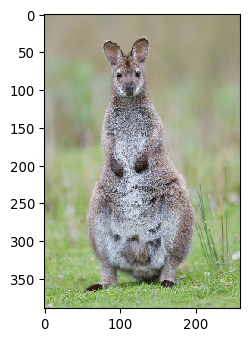

In [4]:
import imageio
import imgaug as ia
%matplotlib inline

image = imageio.imread("https://upload.wikimedia.org/wikipedia/commons/e/e6/Macropus_rufogriseus_rufogriseus_Bruny.jpg")
image = ia.imresize_single_image(image, (389, 259))
ia.imshow(image)

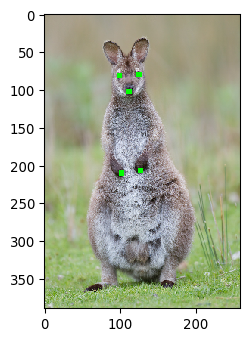

In [5]:
from imgaug.augmentables.kps import Keypoint, KeypointsOnImage
kps = [
    Keypoint(x=99, y=81),   # left eye (from camera perspective)
    Keypoint(x=125, y=80),  # right eye
    Keypoint(x=112, y=102), # nose
    Keypoint(x=102, y=210), # left paw
    Keypoint(x=127, y=207)  # right paw
]
kpsoi = KeypointsOnImage(kps, shape=image.shape)

ia.imshow(kpsoi.draw_on_image(image, size=7))

In [6]:
print(kpsoi.keypoints)

[Keypoint(x=99.00000000, y=81.00000000), Keypoint(x=125.00000000, y=80.00000000), Keypoint(x=112.00000000, y=102.00000000), Keypoint(x=102.00000000, y=210.00000000), Keypoint(x=127.00000000, y=207.00000000)]


In [7]:
import imgaug.augmenters as iaa
ia.seed(3)

seq = iaa.Sequential([
    iaa.Affine(translate_px={"x": (10, 30)}, rotate=(-10, 10)),
    iaa.AddToHueAndSaturation((-50, 50))  # color jitter, only affects the image
])

In [9]:
image_aug, kpsoi_aug = seq(image=image, keypoints=kpsoi)

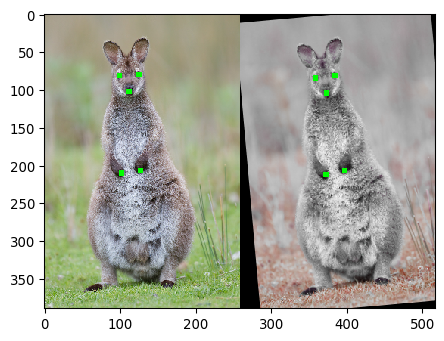

In [10]:

import numpy as np
ia.imshow(
    np.hstack([
        kpsoi.draw_on_image(image, size=7),
        kpsoi_aug.draw_on_image(image_aug, size=7)
    ])
)